# Sentiment Analysis

1. **TextBlob Modile**: Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module aloows us to take advantage of these labels.
2. **Sentiment Labels**: Each word in a corpus is labeled in terms of polarity and subjectivity(there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
    * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
    * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

## Sentiment Routine 

In [1]:
import pandas as pd
data = pd.read_pickle('corpus.pkl')
data

,transcript
Ernest Hemingway,by Carlos Baker Since his death in the summer ...
Joseph Conrad,The Ambiguous Beginning of “Heart of Darkness”...
Vladimir Nabokov,Who and what is Vladimir Nabokov (the author o...


In [2]:
from textblob import TextBlob
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity
data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data['full_name'] = ['Ernest Hemingway','Joseph Conrad','Vladimir Nabokov']
data
#Polarity is float which lies in the range of [-1,1] 
#where 1 means positive statement and -1 means a negative statement. 
#Subjective sentences generally refer to personal opinion, emotion 
#or judgment whereas objective refers to factual information. 
#Subjectivity is also a float which lies in the range of [0,1].

,transcript,polarity,subjectivity,full_name
Ernest Hemingway,by Carlos Baker Since his death in the summer ...,0.107144,0.462733,Ernest Hemingway
Joseph Conrad,The Ambiguous Beginning of “Heart of Darkness”...,0.039359,0.443815,Joseph Conrad
Vladimir Nabokov,Who and what is Vladimir Nabokov (the author o...,0.082810,0.448001,Vladimir Nabokov


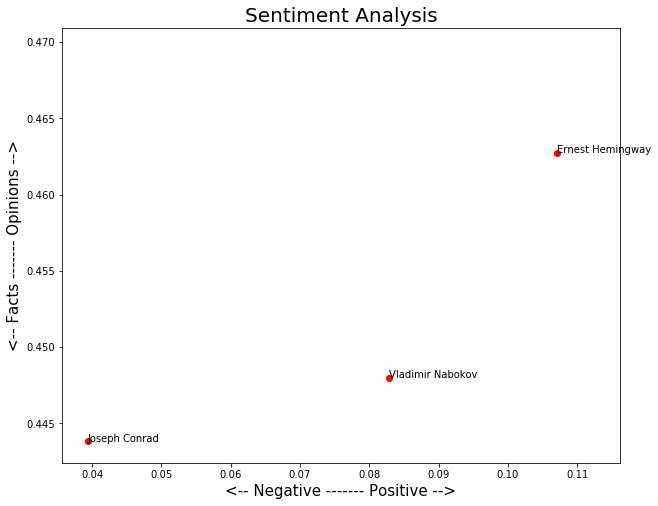

In [8]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,8]

for index,writer in enumerate(data.index):
    x = data.polarity.loc[writer]
    y = data.subjectivity.loc[writer]
    plt.scatter(x,y,color = 'red')
    plt.text(x,y,data['full_name'][index],fontsize=10)
    #plt.xlim(-.01,.12)
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative ------- Positive -->',fontsize=15)
plt.ylabel('<-- Facts ------- Opinions -->', fontsize=15)
plt.show()

## Sentiment of Routine Over Time 

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [31]:
import numpy as np
import math
def split_text(text,n=10):
    length = len(text)
    size = math.floor(length/n) ######Make as Integer
    start = np.arange(0,length,size) ### return to a list ###
    print(start)
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list
    

In [32]:
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    print(t[0:20])
    list_pieces.append(split)

print(len(list_pieces))
print(len(list_pieces[0]))
#list_pieces

[    0  2878  5756  8634 11512 14390 17268 20146 23024 25902 28780]
by Carlos Baker Sinc
[    0  1393  2786  4179  5572  6965  8358  9751 11144 12537]
The Ambiguous Beginn
[    0  3120  6240  9360 12480 15600 18720 21840 24960 28080 31200]
Who and what is Vlad
3
10


In [13]:
polarity_transcript = []
for lp in list_pieces:    #### For each part ####
    polarity_piece = []
    for p in lp:          #### For each section ####
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
polarity_transcript


[[0.11996682511388394,
  0.14040186346220823,
  0.0618139062583507,
  0.06595302099334358,
  0.2165800865800866,
  0.07268652915711739,
  0.0983609693877551,
  0.11435416666666667,
  0.10335748792270533,
  0.1064162028447743],
 [0.1125,
  0.09874999999999999,
  -0.017424242424242408,
  -0.13514492753623186,
  0.02720588235294117,
  0.10094797178130513,
  0.11923076923076925,
  0.09957837301587302,
  0.06279761904761907,
  0.02710084033613445],
 [0.1196095571095571,
  0.14908963585434173,
  0.10648677248677249,
  0.05666666666666668,
  0.11874149659863946,
  0.055941770647653,
  0.09707865830314807,
  0.12186191180093621,
  -0.035992703533026096,
  0.09272727272727273]]

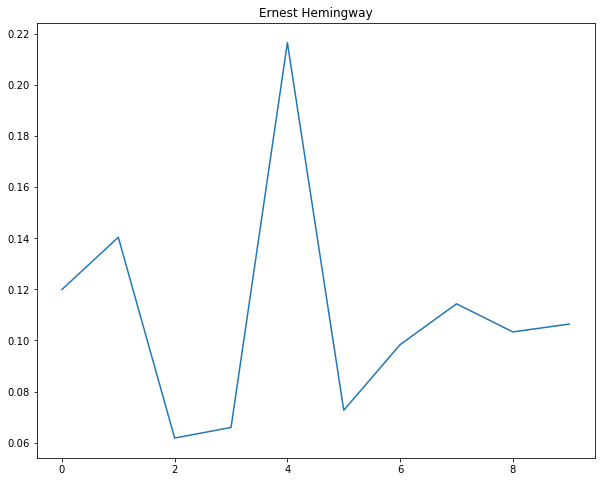

In [19]:
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
#plt.show()

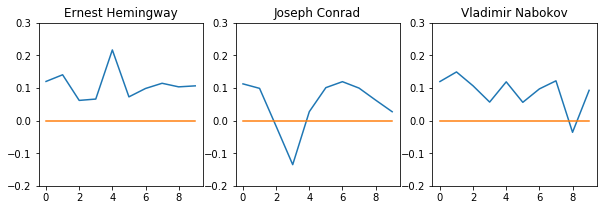

In [25]:
plt.rcParams['figure.figsize'] = [10,3]

for index, writer in enumerate(data.index):
    plt.subplot(1,3,index+1) ####Seperate to 3 subplot
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10),np.zeros(10))## horizontal
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2,ymax=.3)     ##### axis y range
    